/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "upper rigth". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  six.iterkeys(self.codes))))


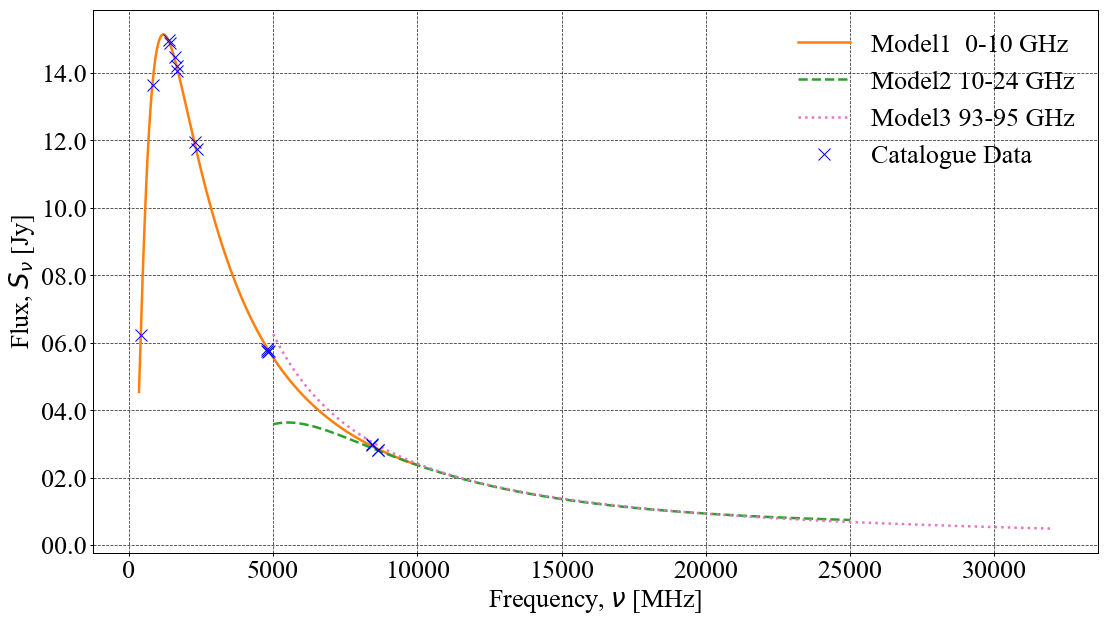

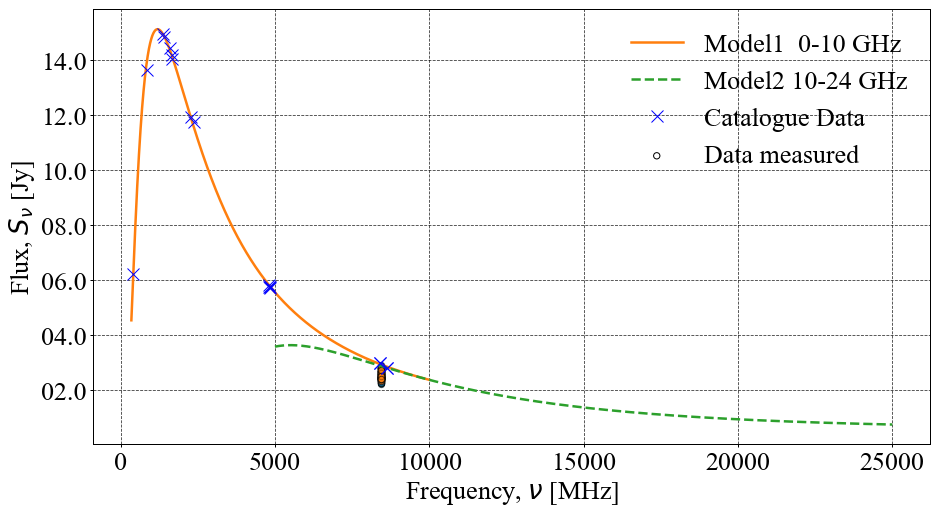

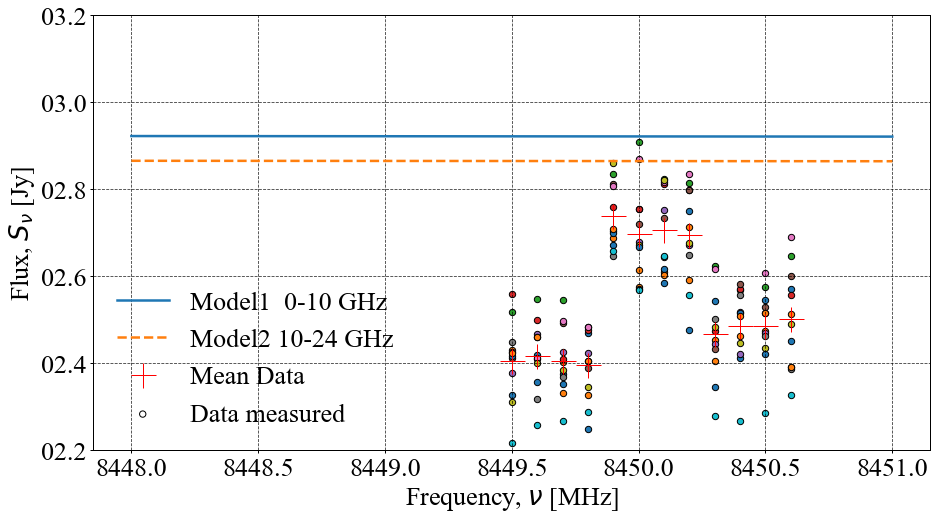

In [1]:
%matplotlib inline
### Model for 1934-638
### Flux density model for 1934-638 from Reynolds 1994
### S=10^(-30.7667 + 26.4908*(np.log10(f)) + 7.0977*(np.log10(f))^2 + 0.605334*(np.log10(f))^3)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import LogLocator, FormatStrFormatter, LinearLocator, FixedLocator
from scipy.optimize import curve_fit
from matplotlib.pylab import rcParams

# set global settings
def init_plotting():
    rcParams['figure.figsize'] = 15,8
    rcParams['font.size'] = 26
    rcParams['font.family'] = 'Times New Roman'
    rcParams['axes.labelsize'] = plt.rcParams['font.size']
    rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
    rcParams['legend.fontsize'] = plt.rcParams['font.size']
    rcParams['legend.markerscale'] = 1
    rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    rcParams['xtick.major.size'] = 3
    rcParams['xtick.minor.size'] = 3
    rcParams['xtick.major.width'] = 1
    rcParams['xtick.minor.width'] = 1
    rcParams['ytick.major.size'] = 3
    rcParams['ytick.minor.size'] = 3
    rcParams['ytick.major.width'] = 1
    rcParams['ytick.minor.width'] = 1
    rcParams['legend.frameon'] = False
    rcParams['legend.loc'] = 'center left'
    rcParams['axes.linewidth'] = 1
    rcParams['grid.alpha'] = 0.8 
#     gca().spines['right'].set_color('none')
#     gca().spines['top'].set_color('none')
#     gca().xaxis.set_ticks_position('bottom')
#     gca().yaxis.set_ticks_position('left')

# This looks like a line on a lof-log plot.
def func1(x, a, b):
    return a * np.power(x, b)

def rms(array):
    return np.sqrt(np.mean(np.power(array, 2)))

def func(x, a, b):
    return 10^(a*x+b)

def mean_reject_outliers(data, m=1):
    a=data[abs(data - np.mean(data)) < m * np.std(data)]
    return a.mean()

def model1(f):
    return 10**(-30.7667 + 26.4908*(np.log10(f)) - 7.0977*(np.log10(f))**2 + 0.605334*(np.log10(f))**3)

def model2(f):
    return 10**(-202.6259+149.7321*(np.log10(f))-36.4943*(np.log10(f))**2 + 2.9372*(np.log10(f))**3)

def model3(f):
    return 10**(5.8870-1.3763*(np.log10(f)))


init_plotting()

tickformat = "%04.1f"

f1 = np.linspace( 350, 10000, num=100000) # 0 - 10 GHz 
f2 = np.linspace(5000, 25000, num=100000) # 10 - 24 GHz
f3 = np.linspace(5000, 32000, num=100000) # 10 - 24 GHz

S1=model1(f1)
S2=model2(f2)
S3=model3(f3)

Fdata=np.array([408 ,843  ,1380 ,1413 ,1612 ,1660 ,1665 ,2295 ,2378 ,4800 , 4800, 4835, 4850, 8415, 8420, 8640, 8640])
Data=np.array([6.24,13.65,14.96,14.87,14.47,14.06,14.21,11.95,11.75, 5.81, 5.76, 5.72, 5.74, 2.99, 2.97, 2.81, 2.81])

fig, ax = plt.subplots(figsize=(18,10))
#ax.loglog(f1,S1,label='Model1  0-10 GHz | Reynolds (1994)', linestyle='-')
#ax.loglog(f2,S2,label='Model2 10-24 GHz | Sault (2003)', linestyle='-')
#ax.loglog(f3,S3,label='Model3 93-95 GHz | Partridge (2016)', linestyle='-')
plt.plot(f1,S1,label='Model1  0-10 GHz',color='C1', linestyle='-',linewidth=2.5)
plt.plot(f2,S2,label='Model2 10-24 GHz',color='C2', linestyle='--',linewidth=2.5)
plt.plot(f3,S3,label='Model3 93-95 GHz',color='C6', linestyle=':',linewidth=2.5)
plt.plot(Fdata,Data,label='Catalogue Data',color='b',marker='x', markersize=12, linestyle='')
plt.grid(b=True, which='major', color='k', linestyle='--')
plt.grid(b=True, which='minor', color='k', linestyle='--')
axes = plt.gca()
axes.yaxis.set_major_formatter(FormatStrFormatter(tickformat))
# plt.title('1934-648')
plt.xlabel(r'Frequency, $\nu$ [MHz]')
plt.ylabel(r'Flux, $S_\nu$ [Jy]')
plt.legend(ncol=1,loc='upper rigth')

Fdata=np.array([408 ,843  ,1380 ,1413 ,1612 ,1660 ,1665 ,2295 ,2378 ,4800 , 4800, 4835, 4850, 8415, 8420, 8640, 8640])
Data=np.array([6.24,13.65,14.96,14.87,14.47,14.06,14.21,11.95,11.75, 5.81, 5.76, 5.72, 5.74, 2.99, 2.97, 2.81, 2.81])

Freq=np.array([8449.5,8449.6,8449.7,8449.8,8449.9,8450.0,8450.1,8450.2,8450.3,8450.4,8450.5,8450.6])
Flux=np.array([[2.32701,2.419,2.37643,2.46911,2.67257,2.75389,2.58542,2.75013,2.54416,2.41186,2.54568,2.57097],
               [2.42963,2.41062,2.40294,2.32748,2.68927,2.57525,2.61093,2.59255,2.45442,2.46203,2.47405,2.51366],
               [2.51813,2.54838,2.54599,2.48269,2.83511,2.90829,2.82457,2.81532,2.62436,2.56786,2.57535,2.64656],
               [2.55864,2.49877,2.41088,2.47759,2.75915,2.75587,2.81178,2.79942,2.47344,2.57001,2.51555,2.55802],
               [2.37774,2.46752,2.42643,2.42404,2.70512,2.67996,2.75221,2.67315,2.444,2.42231,2.46945,2.39144],
#               [2.73496,2.76999,2.78473,2.73892,3.24069,3.25258,3.25743,3.37658,3.18992,3.24074,3.19964,3.19893],
               [2.41257,2.46085,2.49242,2.38868,2.81188,2.7209,2.73348,2.79821,2.43384,2.5816,2.52951,2.60096],
               [2.42681,2.41292,2.49681,2.48447,2.80661,2.87081,2.81633,2.83489,2.61745,2.51814,2.60723,2.69107],
               [2.44853,2.31865,2.36843,2.40482,2.64605,2.57142,2.64545,2.6501,2.50191,2.55683,2.46363,2.38772],
               [2.31187,2.40184,2.38398,2.34466,2.85954,2.67231,2.82248,2.67681,2.48339,2.44647,2.43545,2.49087],
               [2.21708,2.25783,2.26664,2.2879,2.65807,2.56794,2.64784,2.55687,2.27904,2.26831,2.28658,2.32759],
               [2.41653,2.35648,2.35193,2.24839,2.69903,2.6665,2.61783,2.4772,2.34553,2.5163,2.421,2.4519],
               [2.42345,2.46001,2.33115,2.40543,2.70952,2.61346,2.60325,2.71421,2.40444,2.50953,2.51559,2.39099]])

Fdata1=np.array([8415, 8420])
Data1=np.array([2.99, 2.97])

fig, ax = plt.subplots()
#ax.loglog(f1,S1,label='Model1  0-10 GHz | Reynolds (1994)', linestyle='-')
#ax.loglog(f2,S2,label='Model2 10-24 GHz | Sault (2003)', linestyle='-')
#ax.loglog(f3,S3,label='Model3 93-95 GHz | Partridge (2016)', linestyle='-')
plt.plot(f1,S1,label='Model1  0-10 GHz',color='C1', linestyle='-',linewidth=2.5)
plt.plot(f2,S2,label='Model2 10-24 GHz',color='C2', linestyle='--',linewidth=2.5)
#plt.plot(f3,S3,label='Model3 93-95 GHz',color='C6', linestyle=':',linewidth=2.5)
plt.plot(Fdata,Data,label='Catalogue Data',color='b',marker='x', markersize=12, linestyle='')

for i in Flux:
    plt.scatter(Freq,i, edgecolors='k',marker='o', label='',s=40,alpha=0.6)
    
#    ax.loglog(Freq,i,label='Data', marker='o', linestyle=' ')

plt.scatter([], [], color='k',facecolors='none', edgecolors='k',marker='o', label='Data measured',s=40)

FluxMean=Flux.mean(axis=0)

#plt.plot(Freq,Flux.mean(axis=0),label='Mean Data', color='r', marker='+', markersize=12, linestyle=' ')

plt.grid(b=True, which='major', color='k', linestyle='--')
plt.grid(b=True, which='minor', color='k', linestyle='--')
axes = plt.gca()
axes.yaxis.set_major_formatter(FormatStrFormatter(tickformat))
# plt.title('1934-648')
plt.xlabel(r'Frequency, $\nu$ [MHz]')
plt.ylabel(r'Flux, $S_\nu$ [Jy]')
plt.legend(loc='upper right',ncol=1)

# f1 = np.linspace(8414, 8451, num=100000) # 0 - 11 GHz 
# f2 = np.linspace(8414, 8451, num=100000) # 6 - 25 GHz
# f3 = np.linspace(8414, 8451, num=100000) # 6 - 25 GHz
f1 = np.linspace(8448, 8451, num=100000) # 0 - 11 GHz 
f2 = np.linspace(8448, 8451, num=100000) # 6 - 25 GHz
f3 = np.linspace(8448, 8451, num=100000) # 6 - 25 GHz

S1=model1(f1)
S2=model2(f2)
S3=model3(f3)
fig, ax = plt.subplots()
#ax.loglog(f1,S1,label='Model1  0-10 GHz | Reynolds (1994)', linestyle='-')
#ax.loglog(f2,S2,label='Model2 10-24 GHz | Sault (2003)', linestyle='-')
#ax.loglog(f3,S3,label='Model3 93-95 GHz | Partridge (2016)', linestyle='-')
plt.plot(f1,S1,label='Model1  0-10 GHz', linestyle='-',linewidth=2.5)
plt.plot(f2,S2,label='Model2 10-24 GHz', linestyle='--',linewidth=2.5)
#plt.plot(f2,S3,label='Model3 93-95 GHz', linestyle=':',linewidth=2.5)
#plt.plot(Fdata1,Data1,label='Catalogue Data', color='b', marker='x', markersize=12, linestyle=' ')
for i in Flux:
    plt.scatter(Freq,i, edgecolors='k',marker='o', label='',s=40)
plt.scatter([], [], color='k',facecolors='none', edgecolors='k',marker='o', label='Data measured',s=40)
plt.plot(Freq,Flux.mean(axis=0),label='Mean Data', color='r', marker='+', markersize=25, linestyle=' ')
plt.grid(b=True, which='major', color='k', linestyle='--')
plt.grid(b=True, which='minor', color='k', linestyle='--')
axes = plt.gca()
axes.yaxis.set_major_formatter(FormatStrFormatter(tickformat))
# plt.title('1934-648')
plt.xlabel(r'Frequency, $\nu$ [MHz]')
plt.ylabel(r'Flux, $S_\nu$ [Jy]')
plt.ylim(2.2,3.2)
plt.legend(loc='lower left',ncol=1)



Freq=np.array([8449.5,8449.6,8449.7,8449.8,8449.9,8450.0,8450.1,8450.2,8450.3,8450.4,8450.5,8450.6])

s1=model1(Freq)
s2=model2(Freq)
s3=model3(Freq)

Diff1=(FluxMean-s1)*100/s1
Diff2=(FluxMean-s2)*100/s2
Diff3=(FluxMean-s3)*100/s3

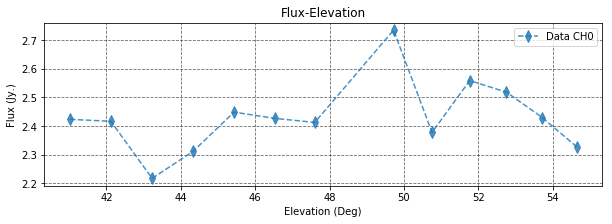

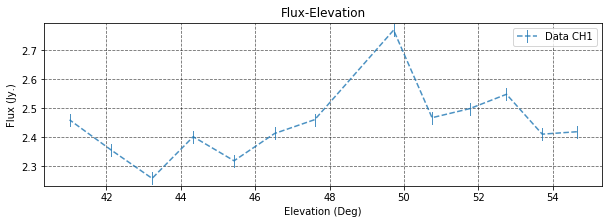

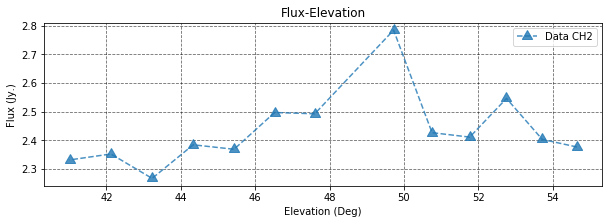

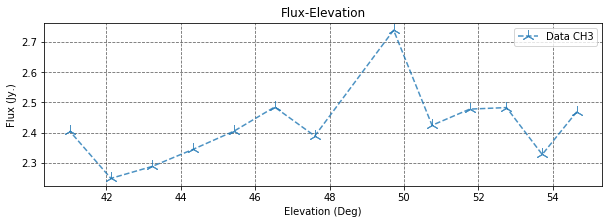

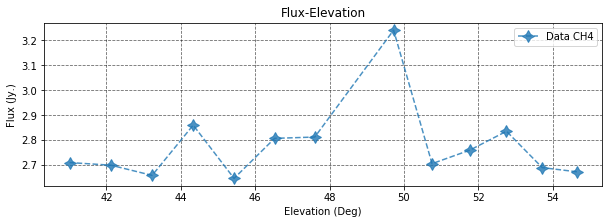

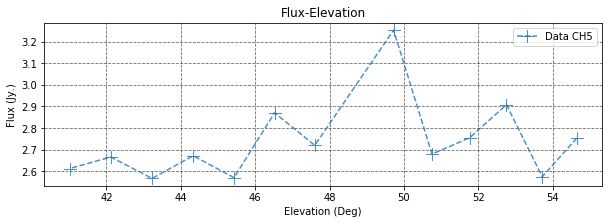

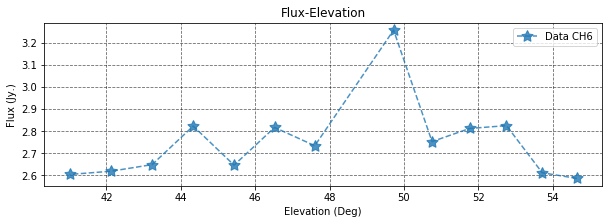

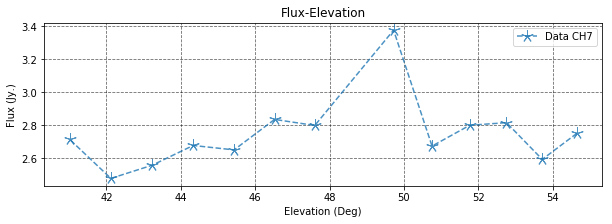

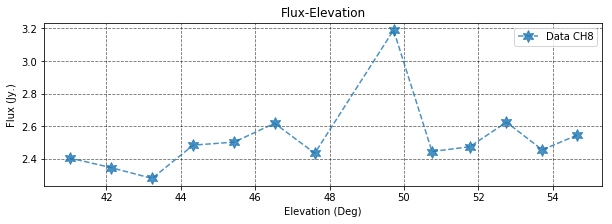

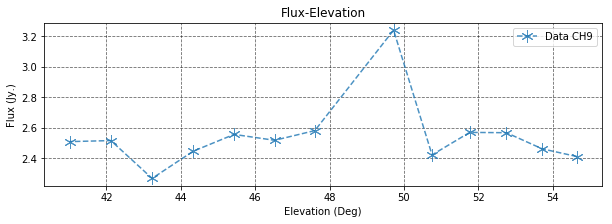

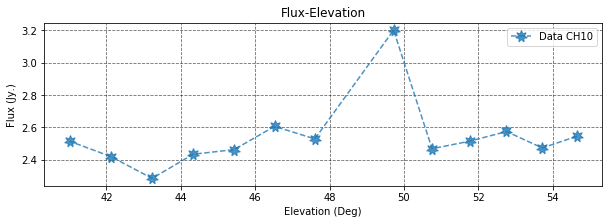

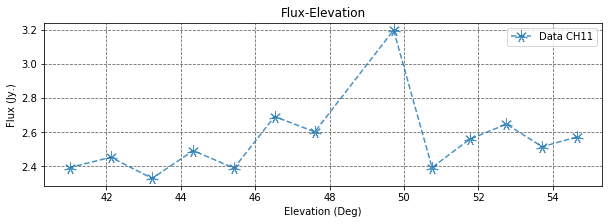

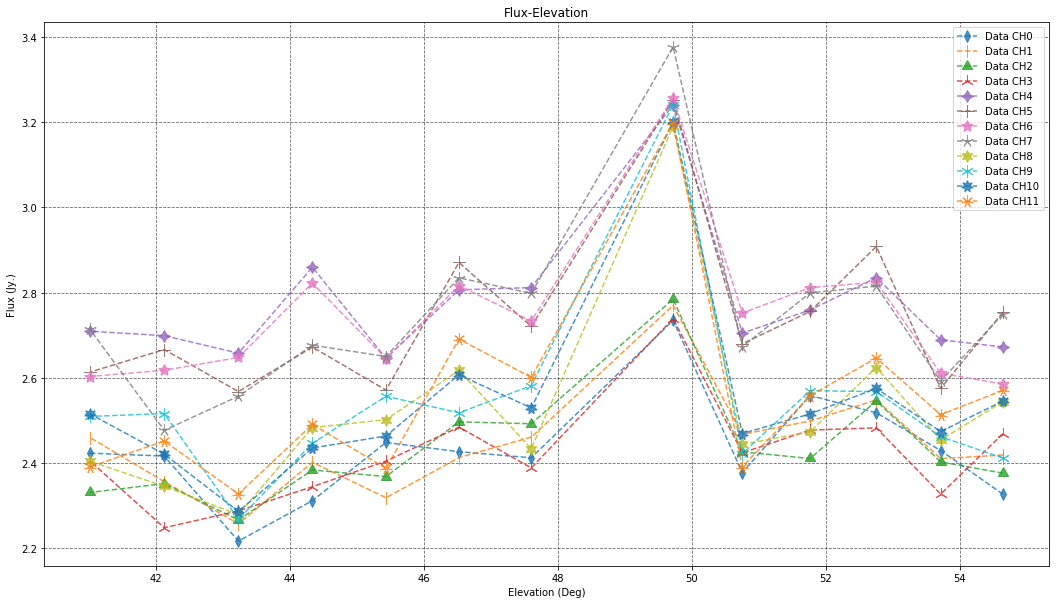

In [71]:
%matplotlib inline
#Evaluate eleveation
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.ticker import LogLocator, FormatStrFormatter
# from scipy.optimize import curve_fit


Freq=np.array([8449.5,8449.6,8449.7,8449.8,8449.9,8450.0,8450.1,8450.2,8450.3,8450.4,8450.5,8450.6])
Flux=np.array([[2.32701,2.419,2.37643,2.46911,2.67257,2.75389,2.58542,2.75013,2.54416,2.41186,2.54568,2.57097],
               [2.42963,2.41062,2.40294,2.32748,2.68927,2.57525,2.61093,2.59255,2.45442,2.46203,2.47405,2.51366],
               [2.51813,2.54838,2.54599,2.48269,2.83511,2.90829,2.82457,2.81532,2.62436,2.56786,2.57535,2.64656],
               [2.55864,2.49877,2.41088,2.47759,2.75915,2.75587,2.81178,2.79942,2.47344,2.57001,2.51555,2.55802],
               [2.37774,2.46752,2.42643,2.42404,2.70512,2.67996,2.75221,2.67315,2.444,2.42231,2.46945,2.39144],
               [2.73496,2.76999,2.78473,2.73892,3.24069,3.25258,3.25743,3.37658,3.18992,3.24074,3.19964,3.19893],
               [2.41257,2.46085,2.49242,2.38868,2.81188,2.7209,2.73348,2.79821,2.43384,2.5816,2.52951,2.60096],
               [2.42681,2.41292,2.49681,2.48447,2.80661,2.87081,2.81633,2.83489,2.61745,2.51814,2.60723,2.69107],
               [2.44853,2.31865,2.36843,2.40482,2.64605,2.57142,2.64545,2.6501,2.50191,2.55683,2.46363,2.38772],
               [2.31187,2.40184,2.38398,2.34466,2.85954,2.67231,2.82248,2.67681,2.48339,2.44647,2.43545,2.49087],
               [2.21708,2.25783,2.26664,2.2879,2.65807,2.56794,2.64784,2.55687,2.27904,2.26831,2.28658,2.32759],
               [2.41653,2.35648,2.35193,2.24839,2.69903,2.6665,2.61783,2.4772,2.34553,2.5163,2.421,2.4519],
               [2.42345,2.46001,2.33115,2.40543,2.70952,2.61346,2.60325,2.71421,2.40444,2.50953,2.51559,2.39099]])

ELV_deg=np.array([54.6466206547055,53.7165003736303,52.7554221204854,51.7669211396373,50.7543187095046,
                  49.7207278973086,47.6020501401677,46.5222419998717,45.4320294137751,44.3336558509572,
                  43.2292304760809,42.1207408474356,41.0100649022041])

markers = [(2+i/2, 1+i%2, 0) for i in range(len(Flux))]

for i in np.arange(len(Flux)-1):
    plt.subplots(figsize=(10,3))
    aux=Flux[0::,0+i:i+1]
    
    plt.plot(ELV_deg,aux,label='Data CH'+str(i), marker = markers[i], markersize=12,linestyle='--',alpha=0.8)

    plt.grid(b=True, which='major', color='k', linestyle='--',alpha=0.6)
    plt.grid(b=True, which='minor', color='k', linestyle='--',alpha=0.6)
    plt.title('Flux-Elevation')
    plt.xlabel('Elevation (Deg)')
    plt.ylabel('Flux (Jy.)')
    plt.legend()

fig, ax = plt.subplots(figsize=(18,10))
for i in np.arange(len(Flux)-1):
    aux=Flux[0::,0+i:i+1]
    plt.plot(ELV_deg,aux,label='Data CH'+str(i), marker = markers[i], markersize=12,linestyle='--',alpha=0.8)
    
plt.grid(b=True, which='major', color='k', linestyle='--',alpha=0.6)
plt.grid(b=True, which='minor', color='k', linestyle='--',alpha=0.6)
plt.title('Flux-Elevation')
plt.xlabel('Elevation (Deg)')
plt.ylabel('Flux (Jy.)')
plt.legend()